# Titanic

In [1]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv')    #importing dataset
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.shape  #checking the shape of dataframe

(891, 12)

In [4]:
df.describe() #for satistical summary

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df.isnull().sum()   #check for null values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [36]:
df['Age'] = df['Age'].fillna(df['Age'].mode()[0])

In [37]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [38]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked'],
      dtype='object')

In [8]:
df=df.drop('Cabin',axis=1)

In [39]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,2
1,2,1,1,0,38.0,1,0,71.2833,0
2,3,1,3,0,26.0,0,0,7.9250,2
3,4,1,1,0,35.0,1,0,53.1000,2
4,5,0,3,1,35.0,0,0,8.0500,2


In [40]:
#Here columns are of categotial data, let's transform it into numeric data.
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
df["Embarked"]=LE.fit_transform(df["Embarked"])
df["Embarked"].value_counts()

2    644
0    168
1     77
3      2
Name: Embarked, dtype: int64

In [41]:
#Here columns are of categotial data, let's transform it into numeric data.
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
df["Sex"]=LE.fit_transform(df["Sex"])
df["Sex"].value_counts()

1    577
0    314
Name: Sex, dtype: int64

In [42]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,2
1,2,1,1,0,38.0,1,0,71.2833,0
2,3,1,3,0,26.0,0,0,7.9250,2
3,4,1,1,0,35.0,1,0,53.1000,2
4,5,0,3,1,35.0,0,0,8.0500,2


In [43]:
#dropping the column Name
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,2
1,2,1,1,0,38.0,1,0,71.2833,0
2,3,1,3,0,26.0,0,0,7.9250,2
3,4,1,1,0,35.0,1,0,53.1000,2
4,5,0,3,1,35.0,0,0,8.0500,2


In [44]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Embarked         int64
dtype: object

In [45]:
#lets check for coreleation
df.corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,1.000000,-0.005007,-0.035144,0.042939,0.036186,-0.057527,-0.001652,0.012658,0.013083
Survived,-0.005007,1.000000,-0.338481,-0.543351,-0.052872,-0.035322,0.081629,0.257307,-0.163517
Pclass,-0.035144,-0.338481,1.000000,0.131900,-0.356187,0.083081,0.018443,-0.549500,0.157112
Sex,0.042939,-0.543351,0.131900,1.000000,0.073377,-0.114631,-0.245489,-0.182333,0.104057
Age,0.036186,-0.052872,-0.356187,0.073377,1.000000,-0.232411,-0.155118,0.107554,0.004575
SibSp,-0.057527,-0.035322,0.083081,-0.114631,-0.232411,1.000000,0.414838,0.159651,0.066654
Parch,-0.001652,0.081629,0.018443,-0.245489,-0.155118,0.414838,1.000000,0.216225,0.038322
Fare,0.012658,0.257307,-0.549500,-0.182333,0.107554,0.159651,0.216225,1.000000,-0.221226
Embarked,0.013083,-0.163517,0.157112,0.104057,0.004575,0.066654,0.038322,-0.221226,1.000000


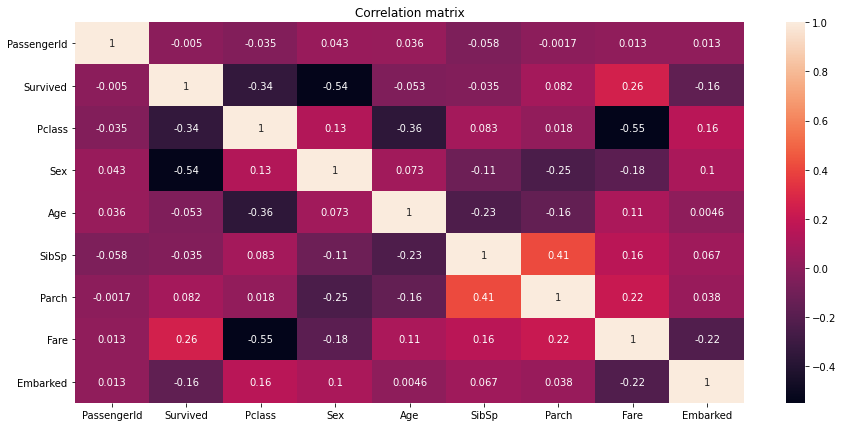

In [46]:
#Correleation heatmap
corr_mat=df.corr()
plt.figure(figsize=[15,7])
sns.heatmap(corr_mat,annot=True)
plt.title("Correlation matrix")
plt.show()

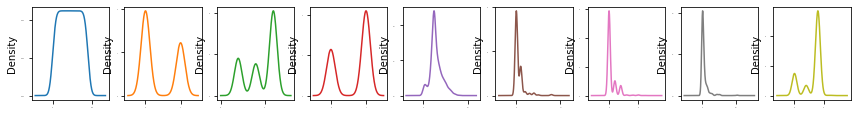

In [47]:
#Cheking data distribution of data
df.plot(kind="density", subplots=True,layout=(6,11), sharex=False, legend= False, fontsize=1, figsize=(18,12))
plt.show()

In [56]:
#Here skewness is present.
#splitting the independent and target variable columns into x and y to remove skewness.
x=df.drop("Survived", axis = 1)
y=df["Survived"]

In [57]:
#checking skewness
x.skew()    #here data is highly skewed
#considering the range of (-5,5)

PassengerId    0.000000
Pclass        -0.630548
Sex           -0.618921
Age            0.657753
SibSp          3.695352
Parch          2.749117
Fare           4.787317
Embarked      -1.246689
dtype: float64

In [58]:
#removing skewness using power transform method
from sklearn.preprocessing import power_transform
x_new = power_transform(x)
x=pd.DataFrame(x_new,columns=x.columns)
x.skew()  #validating if skewness is removed or not

PassengerId   -0.283201
Pclass        -0.441438
Sex           -0.618921
Age            0.080888
SibSp          0.808608
Parch          1.228795
Fare          -0.040329
Embarked      -0.861651
dtype: float64

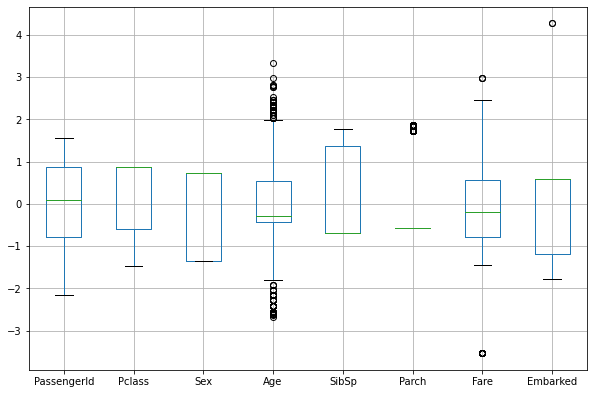

In [59]:
#above result shows skewness is removed
#now checking for outliers
x.iloc[:,0:].boxplot(figsize=[10,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

In [60]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [61]:
#here in all the columns outliers are near the wisk hence considering no outliers are present
#hence can proceed for Finding the best random state.
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
maxAccu=0
maxRS=0
for i in range (1,1000) :
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.20, random_state=i)
    LR = LogisticRegression()
    LR.fit(x_train, y_train)
    predrf = LR.predict(x_test)
    acc=accuracy_score(y_test, predrf)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print ("Best accuracy is",maxAccu,"on Random_state", maxRS)

Best accuracy is 0.8770949720670391 on Random_state 590


In [62]:
#Creating train test split at random state 479
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.20,random_state=590)

#Logistic Regression

from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(x_train, y_train)
predlr = LR.predict(x_test)
print ("Accuracy",accuracy_score(y_test, predlr)*100)
print (confusion_matrix(y_test, predlr))
print(classification_report(y_test,predlr))

Accuracy 87.70949720670392
[[97  6]
 [16 60]]
              precision    recall  f1-score   support

           0       0.86      0.94      0.90       103
           1       0.91      0.79      0.85        76

    accuracy                           0.88       179
   macro avg       0.88      0.87      0.87       179
weighted avg       0.88      0.88      0.88       179



In [63]:
#Decision tree classifier
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
preddt = dt.predict(x_test)
print("Accuracy", accuracy_score(y_test, preddt)*100)
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

Accuracy 72.06703910614524
[[81 22]
 [28 48]]
              precision    recall  f1-score   support

           0       0.74      0.79      0.76       103
           1       0.69      0.63      0.66        76

    accuracy                           0.72       179
   macro avg       0.71      0.71      0.71       179
weighted avg       0.72      0.72      0.72       179



In [64]:
#Random forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
predrf = rf.predict(x_test)
print("Accuracy", accuracy_score(y_test, predrf)*100)
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

Accuracy 86.03351955307262
[[96  7]
 [18 58]]
              precision    recall  f1-score   support

           0       0.84      0.93      0.88       103
           1       0.89      0.76      0.82        76

    accuracy                           0.86       179
   macro avg       0.87      0.85      0.85       179
weighted avg       0.86      0.86      0.86       179



In [65]:
#SVC
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train, y_train)
ad_pred= svc.predict(x_test)
print("Accuracy", accuracy_score(y_test, ad_pred)*100)
print(confusion_matrix(y_test,ad_pred))
print(classification_report(y_test,ad_pred))

Accuracy 84.91620111731844
[[98  5]
 [22 54]]
              precision    recall  f1-score   support

           0       0.82      0.95      0.88       103
           1       0.92      0.71      0.80        76

    accuracy                           0.85       179
   macro avg       0.87      0.83      0.84       179
weighted avg       0.86      0.85      0.85       179



In [66]:
#cross validation
from sklearn.model_selection import cross_val_score
scr=cross_val_score(LR,x,y,cv=5)
print("cross val score of logistic regression model:",scr.mean())

cross val score of logistic regression model: 0.7845270227857636


In [67]:
scr=cross_val_score(dt,x,y,cv=5)
print("cross val score of decision tree classifer:",scr.mean())

cross val score of decision tree classifer: 0.7364823300483334


In [68]:
scr=cross_val_score(rf,x,y,cv=5)
print("cross val score of random forest classifer:",scr.mean())

cross val score of random forest classifer: 0.791369028937292


In [69]:
scr=cross_val_score(svc,x,y,cv=5)
print("cross val score of SVC:",scr.mean())

cross val score of SVC: 0.8193019898311468


In [70]:
#considering cross val score of random forest classifer: 0.5753722570532915
#performing hyper parameter tuning

from sklearn.model_selection import GridSearchCV

# Creating parameter list to pass in GridSearchcv
parameters = {'max_features': ['auto', 'sqrt','log2'],
                               'max_depth': [4,5,6,7,8,9],
                               'criterion':['gini','entropu']}


GCV=GridSearchCV(RandomForestClassifier(),parameters,cv=5,scoring="accuracy")
GCV.fit(x_train,y_train) # Fitting the data in model
GCV.best_params_ # Printing the best parameter found by GridSearchCV

{'criterion': 'gini', 'max_depth': 9, 'max_features': 'log2'}

In [71]:
GCV_pred=GCV.best_estimator_.predict(x_test) # Predicting with best parameters
accuracy_score(y_test,GCV_pred) # Checking final accuracy

0.8603351955307262

# The accuracy is 86%

In [72]:
#saving the model in pickle format
import joblib
joblib.dump(GCV.best_estimator_,"practice_titanic.pkl")

['practice_titanic.pkl']